<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-23 15:51:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  31.3MB/s    in 6.0s    

2025-08-23 15:51:58 (33.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


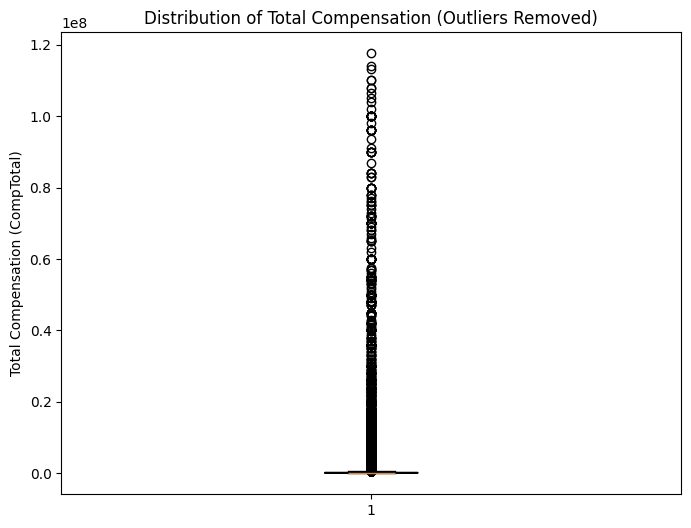

In [9]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# connect to database
conn = sqlite3.connect("survey-data.sqlite")

# query required column
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# convert to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# drop NaN
df = df.dropna(subset=["CompTotal"])

# filter out extreme outliers (keep only up to 99th percentile)
upper_limit = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] <= upper_limit]

# plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(df_filtered["CompTotal"], vert=True, patch_artist=True, notch=True, boxprops=dict(facecolor="skyblue"))

plt.ylabel("Total Compensation (CompTotal)")
plt.title("Distribution of Total Compensation (Outliers Removed)")
plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


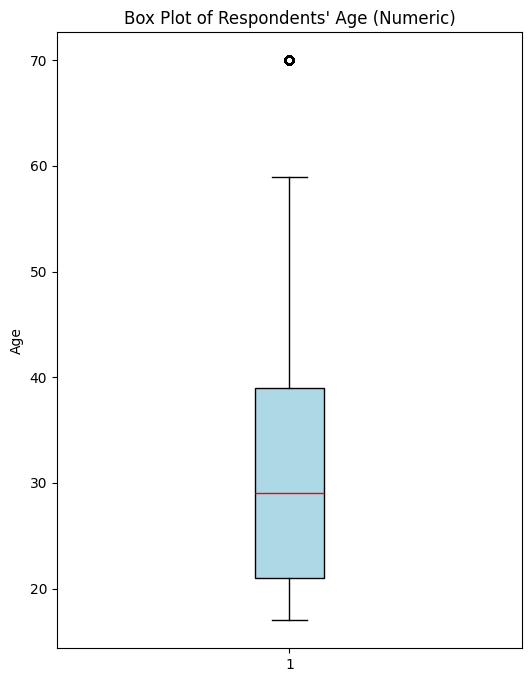

In [12]:
# your code goes here
import re
import matplotlib.pyplot as plt
import pandas as pd

# function to convert Age column into numeric
def convert_age(age):
    if pd.isna(age):
        return None
    age = str(age)

    # case 1: range like "25-34"
    if "-" in age:
        nums = re.findall(r"\d+", age)
        if len(nums) == 2:
            return (int(nums[0]) + int(nums[1])) // 2

    # case 2: "Under 18"
    if "Under" in age:
        return 17

    # case 3: "65 or older"
    if "65" in age and "older" in age:
        return 70

    # case 4: single number like "44 years old"
    nums = re.findall(r"\d+", age)
    if len(nums) == 1:
        return int(nums[0])

    return None

# apply conversion
df["AgeNumeric"] = df["Age"].apply(convert_age)
df = df.dropna(subset=["AgeNumeric"])

# box plot
plt.figure(figsize=(6,8))
plt.boxplot(df["AgeNumeric"], patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="red"))
plt.ylabel("Age")
plt.title("Box Plot of Respondents' Age (Numeric)")
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1000x600 with 0 Axes>

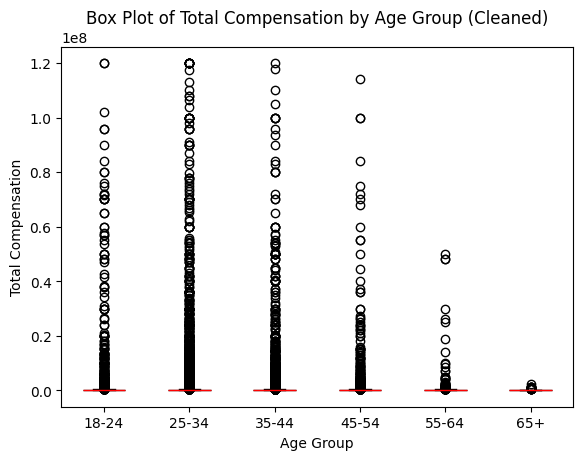

In [15]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Query Age and CompTotal
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Convert Age to numeric midpoints
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}
df["AgeNumeric"] = df["Age"].map(age_map)

# Drop missing values
df = df.dropna(subset=["AgeNumeric", "CompTotal"])

# --- Clean Compensation Data ---
df = df[df["CompTotal"] > 0]  # remove zero/negative
upper_limit = df["CompTotal"].quantile(0.99)  # keep within 99th percentile
df = df[df["CompTotal"] <= upper_limit]

# Create Age Groups
bins = [15, 24, 34, 44, 54, 64, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["AgeGroup"] = pd.cut(df["AgeNumeric"], bins=bins, labels=labels, right=True)

# --- Boxplot ---
plt.figure(figsize=(10,6))
df.boxplot(column="CompTotal", by="AgeGroup", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="black"),
           medianprops=dict(color="red"))

plt.title("Box Plot of Total Compensation by Age Group (Cleaned)")
plt.suptitle("")  
plt.xlabel("Age Group")
plt.ylabel("Total Compensation")
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 800x600 with 0 Axes>

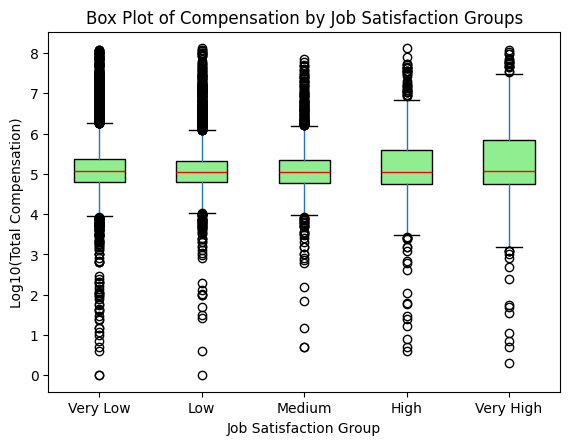

In [18]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Assume df is your dataframe and has 'CompTotal' and 'JobSatPoints_6' ---

# Step 1: Remove rows with missing/invalid values
df = df.dropna(subset=["CompTotal", "JobSatPoints_6"])

# Step 2: Convert compensation to log scale (to handle extreme outliers)
df["LogCompTotal"] = np.log10(df["CompTotal"].replace(0, np.nan))  # avoid log(0)

# Step 3: Define bins for Job Satisfaction points (0–100 scale assumed)
bins = [0, 20, 40, 60, 80, 100]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]

df["JobSatGroup"] = pd.cut(df["JobSatPoints_6"], bins=bins, labels=labels)

# Step 4: Plot Box Plot
plt.figure(figsize=(8,6))
df.boxplot(column="LogCompTotal", by="JobSatGroup", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightgreen", color="black"),
           medianprops=dict(color="red"))

# Step 5: Styling
plt.title("Box Plot of Compensation by Job Satisfaction Groups")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Job Satisfaction Group")
plt.ylabel("Log10(Total Compensation)")
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x600 with 0 Axes>

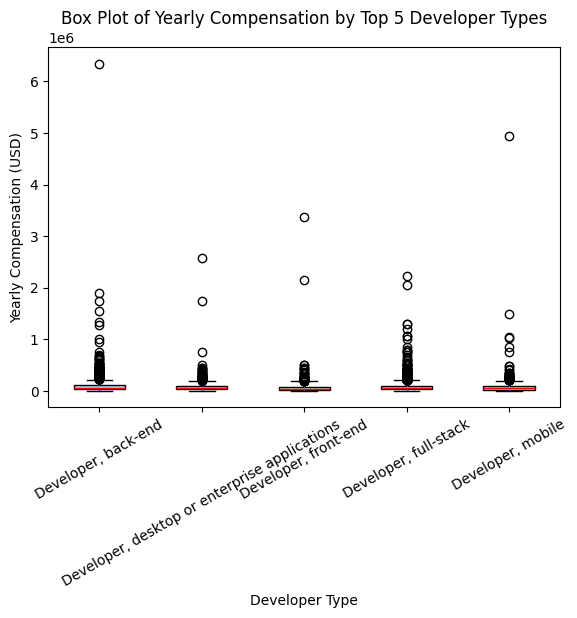

In [22]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Connect to your SQLite DB ---
conn = sqlite3.connect("survey-results-public.sqlite")

# --- Step 2: Load Developer Type and Compensation ---
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Step 3: Handle multiple roles (split DevType by ;) ---
df_exploded = df.assign(DevType=df["DevType"].str.split(";")).explode("DevType")
df_exploded["DevType"] = df_exploded["DevType"].str.strip()

# --- Step 4: Find Top 5 Developer Types ---
top5_devtypes = df_exploded["DevType"].value_counts().head(5).index

# --- Step 5: Filter only Top 5 ---
df_top5 = df_exploded[df_exploded["DevType"].isin(top5_devtypes)]

# --- Step 6: Plot ---
plt.figure(figsize=(10,6))
df_top5.boxplot(column="ConvertedCompYearly", by="DevType", grid=False, patch_artist=True,
                boxprops=dict(facecolor="lightblue", color="black"),
                medianprops=dict(color="red"))

plt.title("Box Plot of Yearly Compensation by Top 5 Developer Types")
plt.suptitle("")  # removes default title
plt.xlabel("Developer Type")
plt.ylabel("Yearly Compensation (USD)")
plt.xticks(rotation=30)
plt.show()

# --- Step 7: Close connection ---
#conn.close()



**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x600 with 0 Axes>

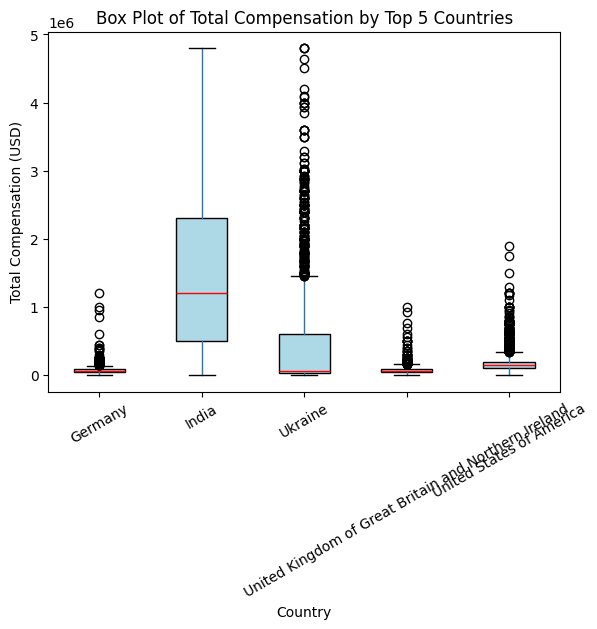

In [27]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load data from main table
query = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Get top 5 countries by number of respondents
top5_countries = df['Country'].value_counts().nlargest(5).index
df_top5 = df[df['Country'].isin(top5_countries)]

# Remove extreme outliers (above 99th percentile)
q99 = df_top5["CompTotal"].quantile(0.99)
df_filtered = df_top5[df_top5["CompTotal"] <= q99]

# Box Plot
plt.figure(figsize=(10,6))
df_filtered.boxplot(column="CompTotal", by="Country", grid=False, patch_artist=True,
                    boxprops=dict(facecolor="lightblue", color="black"),
                    medianprops=dict(color="red"))

plt.title("Box Plot of Total Compensation by Top 5 Countries")
plt.suptitle("")
plt.xlabel("Country")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=30)
plt.show()




### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 800x600 with 0 Axes>

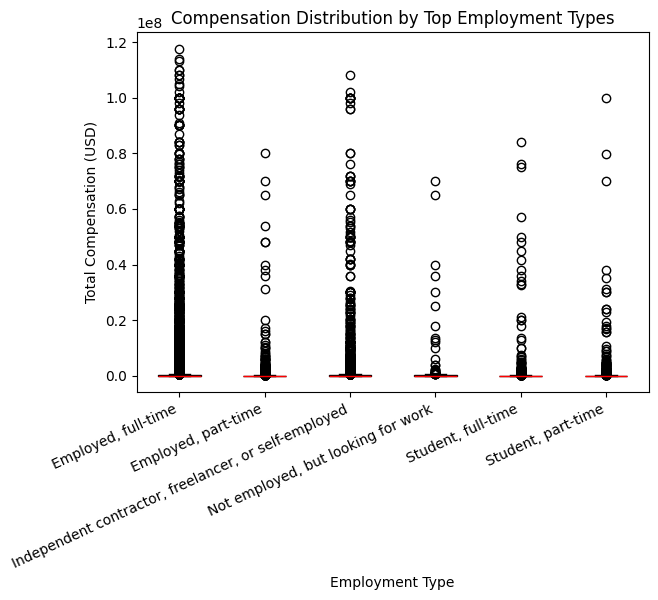

In [29]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load Employment and CompTotal
query = """
SELECT Employment, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Remove extreme outliers (above 99th percentile)
q99 = df["CompTotal"].quantile(0.99)
df = df[df["CompTotal"] <= q99]

# Split multiple employment types into separate rows
df_expanded = df.assign(Employment=df["Employment"].str.split(";")).explode("Employment")
df_expanded["Employment"] = df_expanded["Employment"].str.strip()

# Keep only top 6 employment categories (by frequency)
top_employment = df_expanded["Employment"].value_counts().head(6).index
df_top = df_expanded[df_expanded["Employment"].isin(top_employment)]

# Box Plot
plt.figure(figsize=(8,6))
df_top.boxplot(column="CompTotal", by="Employment", grid=False, patch_artist=True,
               boxprops=dict(facecolor="skyblue", color="black"),
               medianprops=dict(color="red"))

plt.title("Compensation Distribution by Top Employment Types")
plt.suptitle("")
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=25, ha="right")
plt.show()



**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

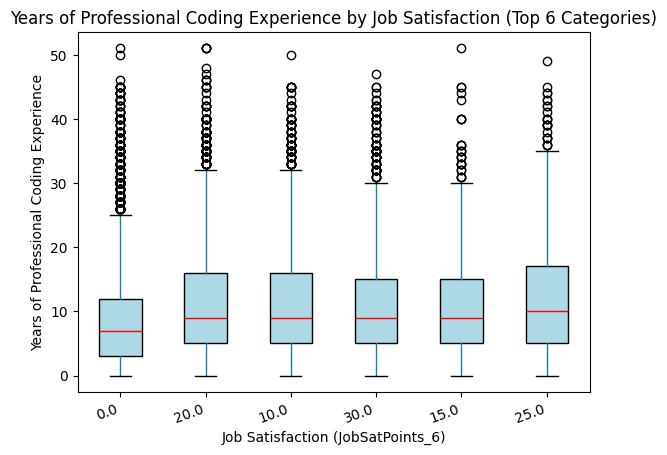

In [31]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect("survey-results-public.sqlite")

# Query data
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Clean YearsCodePro
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": "0",
    "More than 50 years": "51"
})
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Drop NaNs
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_6"])

# Keep only top 6 most frequent JobSatPoints_6
top_cats = df["JobSatPoints_6"].value_counts().nlargest(6).index
df = df[df["JobSatPoints_6"].isin(top_cats)]

# Reorder categories by frequency
df["JobSatPoints_6"] = pd.Categorical(df["JobSatPoints_6"], categories=top_cats, ordered=True)

# Box Plot
plt.figure(figsize=(10,6))
df.boxplot(column="YearsCodePro", by="JobSatPoints_6", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="black"),
           medianprops=dict(color="red"))

plt.title("Years of Professional Coding Experience by Job Satisfaction (Top 6 Categories)")
plt.suptitle("")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Years of Professional Coding Experience")
plt.xticks(rotation=20, ha="right")
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [32]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
